In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from opt_helper import load, plot_result, plot_fig_with_bounds
from exp_utils import Distribution

Using PUBLIC_REPO_DIR = /home/edwardli/src/climate-cooperation-competition
Using _PRIVATE_REPO_DIR = /home/edwardli/src/private-repo-clone


In [2]:
EXPERIMENT_DIR = "experiments"

In [3]:
def get_max_temp_plottable(exp_dumps, variable, mu_or_sigma):
    y_means = []
    y_lower = []
    y_upper = []
    xs = []
    
    for dump in exp_dumps:
        # Find gridsearched variable
        var_dist = dump["overrides"][variable]
        if mu_or_sigma == "mu":
            xs.append(var_dist.mu)
        else:
            xs.append(var_dist.sigma)
            
        # Find max temp
        max_tmp_mean = dump["mean"]["global_temperature"][-1, 0]
        max_tmp_std = dump["std"]["global_temperature"][-1, 0]
        
        y_means.append(max_tmp_mean)
        y_lower.append(max_tmp_mean - 1.96 * max_tmp_std)
        y_upper.append(max_tmp_mean + 1.96 * max_tmp_std)
        
    xs, yl, ym, yu = np.array(xs), np.array(y_lower), np.array(y_means), np.array(y_upper)
    inds = np.argsort(xs)
    xs, yl, ym, yu = np.take_along_axis(xs, inds, axis=0), np.take_along_axis(yl, inds, axis=0), np.take_along_axis(ym, inds, axis=0), np.take_along_axis(yu, inds, axis=0)
        
    return xs, yl, ym, yu

def get_avg_mitigation_rate_plottable(exp_dumps, variable, mu_or_sigma):
    y_means = []
    xs = []
    
    for dump in exp_dumps:
        # Find gridsearched variable
        var_dist = dump["overrides"][variable]
        if mu_or_sigma == "mu":
            xs.append(var_dist.mu)
        else:
            xs.append(var_dist.sigma)
            
        # Find avg mitigation
        y_means.append(np.mean(dump["mean"]["mitigation_rate_all_regions"]))
        
    xs, ym = np.array(xs), np.array(y_means)
    inds = np.argsort(xs)
    xs, ym = np.take_along_axis(xs, inds, axis=0), np.take_along_axis(ym, inds, axis=0)
        
    return xs, ym

def load_all_pkls(path):
    return [load(os.path.join(path, fname)) for fname in os.listdir(path) if '.pkl' in fname]

def plot_with_error_bars(ylabel, xlabel, title, xs, yl, ym, yu):
    line_colors=["#0868ac", "#7e0018"]
    region_colors=["#7bccc4", "#ffac3b"]
    
    plt.plot(
        xs,
        ym,
        linestyle="--",
        color=line_colors[0],
    )
    plt.fill_between(
        xs,
        yl,
        yu,
        color=region_colors[0],
        alpha=0.5,
    )
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(color="#d3d3d3")
    plt.title(title)
    
def plot_normal(ylabel, xlabel, title, xs, ym):
    line_colors=["#0868ac", "#7e0018"]
    region_colors=["#7bccc4", "#ffac3b"]
    
    plt.plot(
        xs,
        ym,
        linestyle="--",
        color=line_colors[0],
    )
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(color="#d3d3d3")
    plt.title(title)


Vanilla RICE-N
==============

In [4]:
vanilla = load("experiments/vanilla/1.pkl")

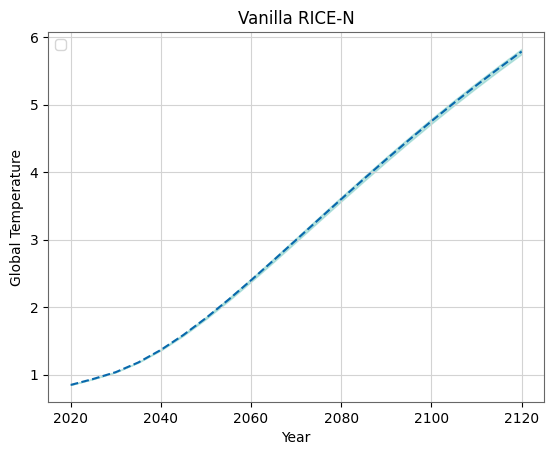

In [5]:
plot_fig_with_bounds(
    "global_temperature",
    "Global Temperature",
    title="Vanilla RICE-N",
    mean_std_off=vanilla)

Catalytic Cooperation w/ best reasonable params
===============================================

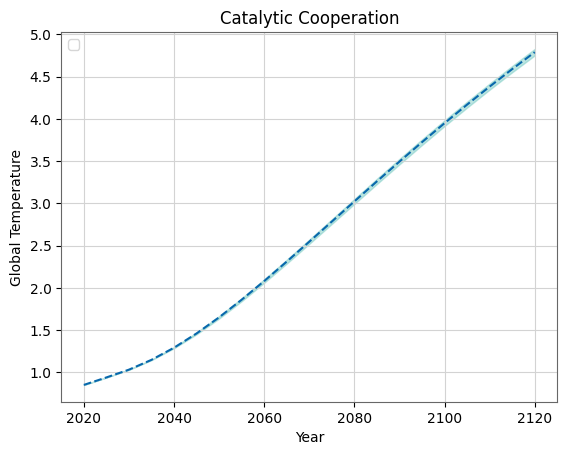

In [6]:
guessed = load("experiments/best/1.pkl")
plot_fig_with_bounds(
    "global_temperature",
    "Global Temperature",
    title="Catalytic Cooperation",
    mean_std_off=guessed)

Private Goods (b_0)
===================

In [7]:
b_0s = load_all_pkls("experiments/b_0")
b_0_plottable = get_max_temp_plottable(b_0s, "xb_0", "mu")

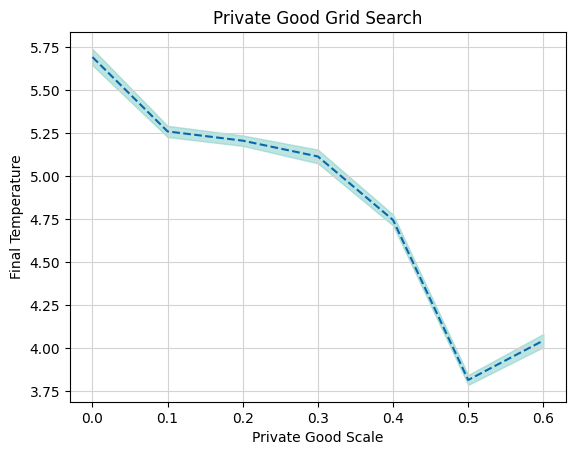

In [8]:
plot_with_error_bars("Final Temperature", "Private Good Scale", "Private Good Grid Search", *b_0_plottable)

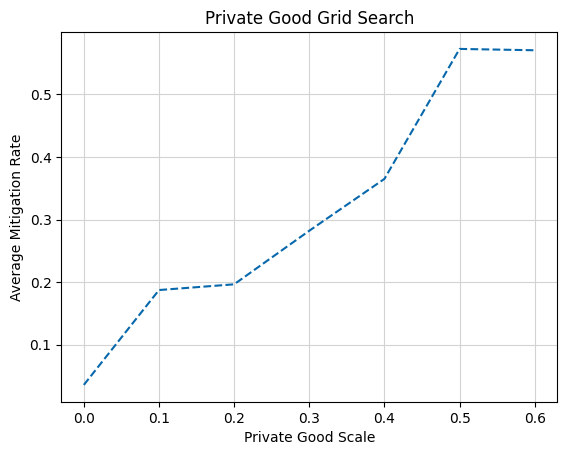

In [9]:
b_0_mu = get_avg_mitigation_rate_plottable(b_0s, "xb_0", "mu")
plot_normal("Average Mitigation Rate", "Private Good Scale", "Private Good Grid Search", *b_0_mu)

Damage Function (a_2)
=====================

In [10]:
a_2s = load_all_pkls("experiments/damage")
a_2_plottable = get_max_temp_plottable(a_2s, "xa_2", "sigma")

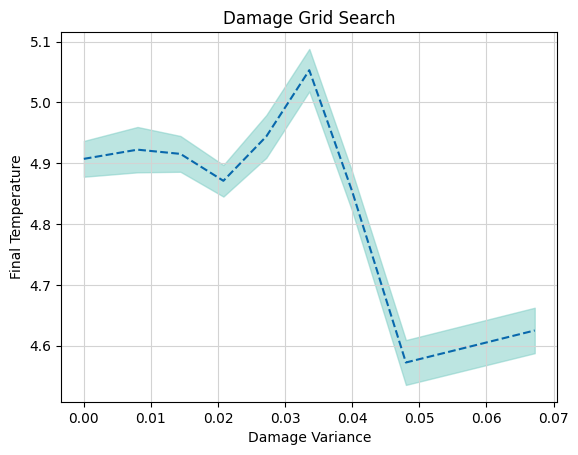

In [11]:
plot_with_error_bars("Final Temperature", "Damage Variance", "Damage Grid Search", *a_2_plottable)

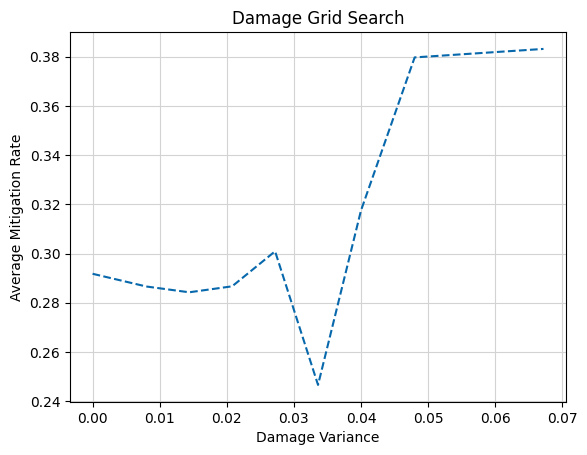

In [12]:
a_2_mu = get_avg_mitigation_rate_plottable(a_2s, "xa_2", "sigma")
plot_normal("Average Mitigation Rate", "Damage Variance", "Damage Grid Search", *a_2_mu)

Increasing Returns (xdelta_ir)
==============================

In [13]:
irs = load_all_pkls("experiments/ir")
ir_plottable = get_max_temp_plottable(irs, "xdelta_ir", "mu")

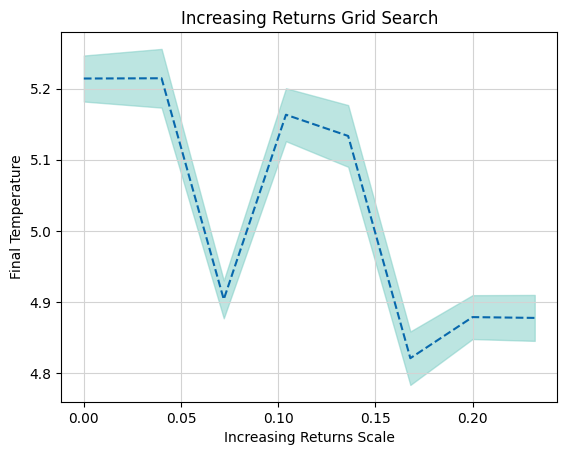

In [14]:
plot_with_error_bars("Final Temperature", "Increasing Returns Scale", "Increasing Returns Grid Search", *ir_plottable)

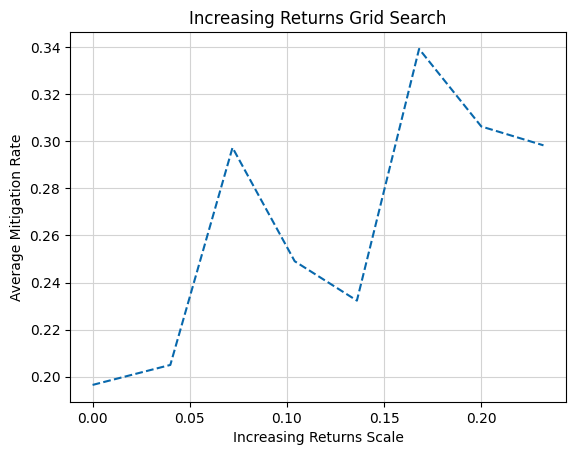

In [15]:
ir_mu = get_avg_mitigation_rate_plottable(irs, "xdelta_ir", "mu")
plot_normal("Average Mitigation Rate", "Increasing Returns Scale", "Increasing Returns Grid Search", *ir_mu)

Mitigation Cost (xp_b)
======================

In [16]:
p_bs = load_all_pkls("experiments/mitigation")
p_b_plottable = get_max_temp_plottable(p_bs, "xp_b", "sigma")

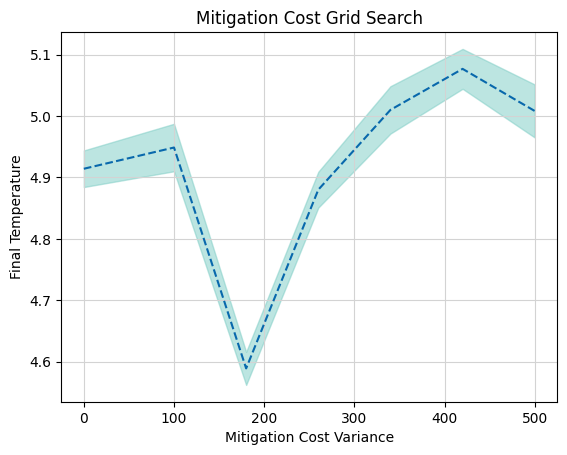

In [17]:
plot_with_error_bars("Final Temperature", "Mitigation Cost Variance", "Mitigation Cost Grid Search", *p_b_plottable)

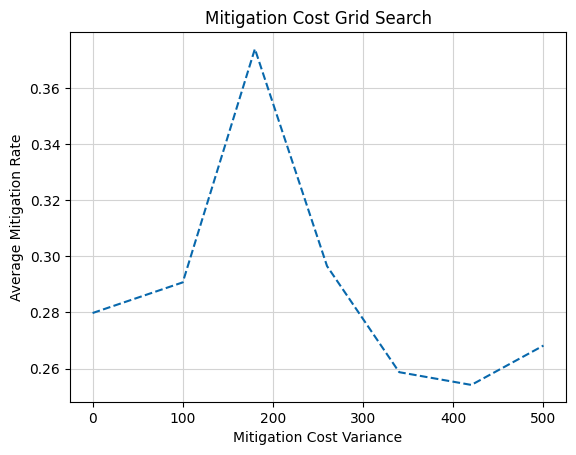

In [18]:
p_b_mu = get_avg_mitigation_rate_plottable(p_bs, "xp_b", "sigma")
plot_normal("Average Mitigation Rate", "Mitigation Cost Variance", "Mitigation Cost Grid Search", *p_b_mu)